## 作業

## 匿名函數操作!

In [3]:
myList = ["apple","banana","papaya","watermelon"]
myList = map(lambda x:x+"!!!", myList)
print((list(myList)))

['apple!!!', 'banana!!!', 'papaya!!!', 'watermelon!!!']


In [11]:
class Student:
    school= "BBC"
    def __init__(self,name):
        self.name = name
        print("__init__")
    def getSchool():
        return Student.school    
    def setSchool(school):
        Student.school = school
    def printInfo(self):
        print(Student.getSchool(),self.name)
st1 = Student("Ken")
st2 = Student("Vivin")
Student.setSchool("CBB")
#st1.school = "CBB"
#print(st1.name)
st1.printInfo()
st2.printInfo()


__init__
__init__
CBB Ken
CBB Vivin


In [14]:
# Animal  希望可以記錄建立多少筆Animal 
# getCount()
class Animal:
    count = 0
    def __init__(self):
        Animal.count += 1
        print("Animal")
    def getCount():
        return Animal.count
a1 = Animal()
a2 = Animal()
a3 = Animal()
print(Animal.getCount())

Animal
Animal
Animal
3


## 其他類別方法實作
+ 其他類別方法實作
  + 類別中宣告類別方法
    + 方法傳入類別cls為第一個參數
    + 方法前使用@classmethod 修飾
    + 只能使用類別名稱呼叫
  + 類別中宣告靜態方法
    + 方法不綁定特定實體：不傳入self為第一個參數
    + 方法前使用@staticmethod 修飾
    + 可以類別名稱或物件名稱呼叫!

In [22]:
class Student:
    school = "VVB"
    phone = "5528877"
    def __init__(self,name):
        self.name = name
    def setSchool(school):
        Student.school =school
    @classmethod    
    def getSchool(std):
        return std.school
    
    def printInfo(self):
        print(self.name,Student.getSchool())
st1 = Student("Vivin")
st1.printInfo()

print(Student.getSchool())    

Vivin VVB
VVB


## 成員項目檢查

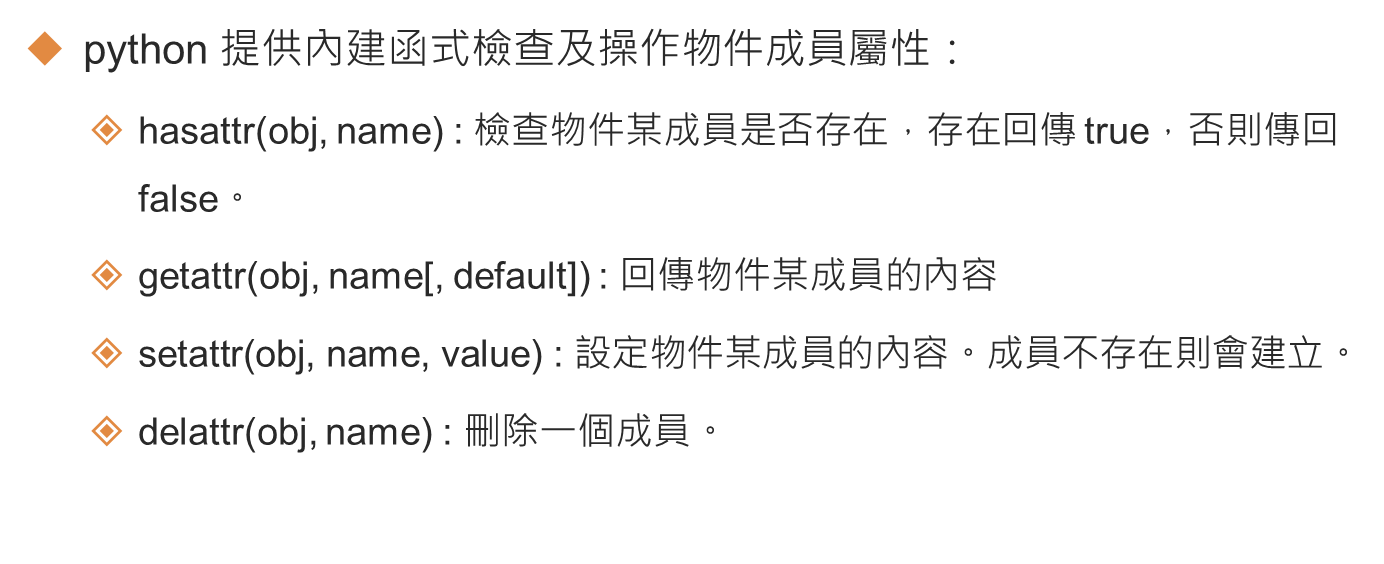

In [34]:
class Item:
    def __init__(self,name):
        self.name = name
it1 = Item("A1")

print(it1.name)
#it1.price = 25

if hasattr(it1,"price"):
    print("取值")
    print(it1.price)
else:
    print("建立")
    setattr(it1,"price",15)
    print(it1.price)

A1
建立
15


## 物件封裝實作
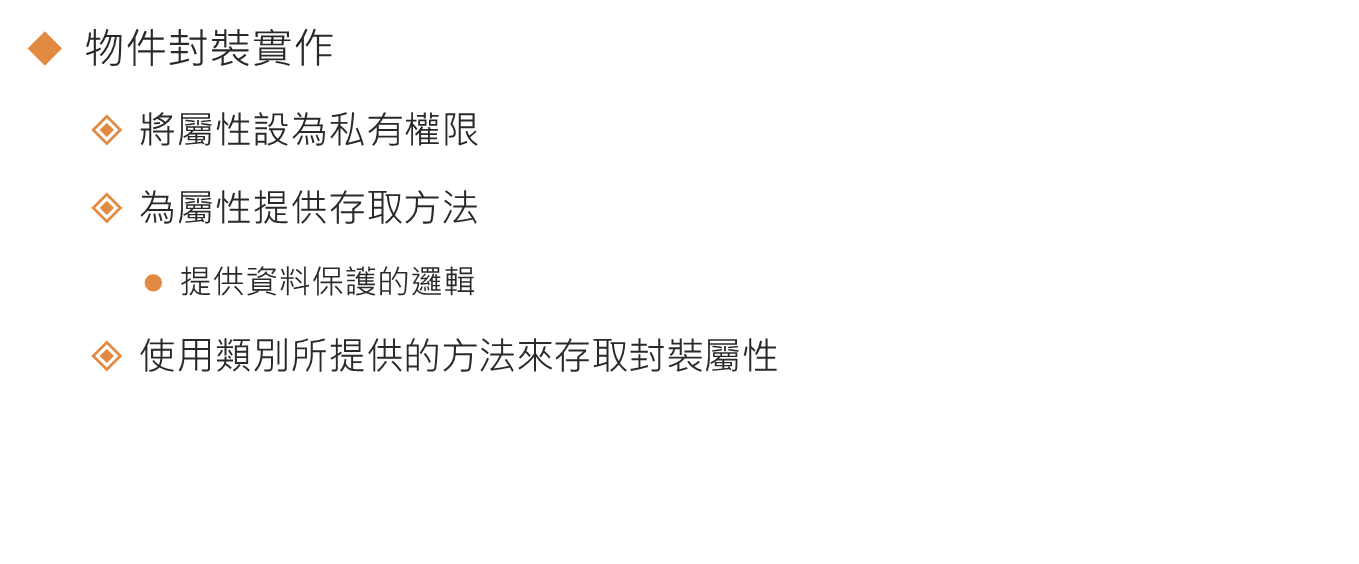

In [58]:
class Person:
    def __init__(self,name,age):
        self.name = name
        self.__age = age #設定為私有 只有在自己的類才能讀       
    def printInfo(self):     
        print(self.name,":",self.getAge())
    def setAge(self,age):
        #年齡必須大於等於0 小於等於200
        #否則拋出OverflowError 並且在OverflowError加入訊息 錯誤的年齡 
        if age < 0 or  age > 200:
            raise OverflowError("錯誤的年齡")
        self.__age = age
            
    def getAge(self):
        return self.__age
p1 = Person("Lucy",83)
p1.name = "Ken"
#p1.__age = -200 
p1.setAge(25)#-200 25 300
p1.printInfo()


Ken : 25


In [94]:
class Employee:
    def __init__(self,salary):
        self.__salary = salary
    def printInfo(self):
        print(self.__salary)
    def set_salary(self,v):    
        print("set_salary:",v)
        if v < 20000:
            raise OverflowError("錯誤薪資")
        self.__salary = v
    def get_salary(self):
        print("get_salary")
        return self.__salary
  
    salary = property(get_salary,set_salary)#順序必須get set del
    
emp1 = Employee(50000)
emp1.salary = 35000
print(emp1.salary)
#emp1.printInfo()


set_salary: 35000
get_salary
35000


In [95]:

class Employee:
    def __init__(self,salary):
        self.__salary = salary
    def printInfo(self):
        print(self.__salary)
    @property
    def salary(self):#讀取
        print("get_salary")
        return self.__salary
    @salary.setter
    def salary(self,v):#設定 
        print("set_salary:",v)
        if v < 20000:
            raise OverflowError("錯誤薪資")
        self.__salary = v
    

mp1 = Employee(50000)
emp1.salary = 35000
print(emp1.salary)
#emp1.printInfo()

set_salary: 35000
get_salary
35000


## 請問執行後的結果是?

In [96]:
class pri:
   __secretCount = 0
   def count(self):
      self.__secretCount += 1
      print (self.__secretCount)
counter = pri()
counter.count()
counter.count()

1
2


## 類別的繼承
+ 繼承語法  
class 子類別(父類別)：
  + 父類別類名寫在括號裡
  + 子類別繼承父類別的成員
    + 子類別找不到定義的成員，會自動尋找父類別內的定義。
    + 類別屬性、類別及實體方法、函數會被繼承下來
    + 實體屬性在__init__()中加入，不一定會被新增
  + 父類別的__init__( )初始化方法不會被自動使用
  + 需要在子類別的初始化方法中指定使用才會執行
     + super(子類別, self).__init__(…) 
     + 不呼叫父類別初始化方法時，不會新增父類別實體屬性 

In [120]:
class Animal:
    def __init__(self,name,age):
        print("Animal")
        self.__name = name
        self.__age = age
    def getName(self):
        return self.__name
    def getAge(self):
        return self.__age
a1 = Animal("MoMo",2)    
print(a1.getName(),a1.getAge())

## Cat沒有自行呼叫__init__ 所以不須呼叫super(Dog,self).__init__(name,age)
class Cat(Animal):
    def getCatName(self):
        return f"cat:{self.getName()}"
cat1 = Cat("Kitty",10)
print(cat1.getCatName(),cat1.getAge())
## 因為Dog 新增了  __weight屬性所以 必須呼叫super      
class Dog(Animal):
    def __init__(self,name,age,weight):
        super(Dog,self).__init__(name,age) 
        self.__weight = weight
        
dog1 = Dog("Bobo",2,16.2) 
print(dog1.getName(),":",dog1.getAge())

        

Animal
MoMo 2
Animal
cat:Kitty 10
Animal
Bobo : 2


## 方法覆寫

In [114]:
class Parent:
    def myMethod(self):
        print("A")
class Child(Parent):
    def myMethod(self):
        print("B")
c = Child()
c.myMethod()

B


In [117]:
class Parent:
    def myMethod(self):
        print("A")
class Child(Parent):
    def myMethod(self):
        super().myMethod() #呼叫父類別的myMethod
        print("B")
c = Child()
c.myMethod()

A
B


## 多重繼承
+ 繼承多個父類別時用，隔開
+ 注意成員搜尋的順序
  + 從子類別開始
  + 同一階層父類別由左至右搜尋
  + 更上層祖父類別由左至右搜尋
  + 直到達到頂層為止

In [123]:
class S:
    def method1(self):
        print("S.method1")
    def method2(self):
        print("S.method2")  
        
class A(S):
    def method3(self):
        print("A.method3")
        
class B(S):
    def method2(self):
        print("B.method2")
    def method3(self):
        print("B.method3")
class C(A,B):
    def method4(self):
        print("C.method4")        
c = C()    
c.method4()
c.method3()
c.method2()
c.method1()

C.method4
A.method3
B.method2
S.method1


## Python類別內建屬性
+ __class__：物件所屬類別
+ __module__：類別/物件所屬模組字串
+ 若沒有引用其他模組則預設為  ′__main__′ 
+ __name__：類別名稱字串
+ __bases__：類別所有父類別，傳回 tuple
+ __dict__：類別/物件所屬名稱空間字典(鍵值對)
+ __doc__：類別說明字串
  + 模組、 類別、屬性、方法、函式下使用三引號字串定義的說明文字 docstring。

In [124]:
class Student:
    '''學生類別'''
    school="pcschool"
    count=0
    def __init__(self, name):
        self.name = name
        Student.count += 1
    def displayCount(self):
        """選示學生人數"""
        print("學生人數:  %d" % Student.count)
    def __printInfo__(self):
        return ("姓名: "+self.name)

print("類別所屬類別:", Student.__class__)
print("類別所屬模組:", Student.__module__)
print("類別名稱:", Student.__name__)
print("類別的父類別:", Student.__bases__)
print("類別空間字典:", Student.__dict__)
print("類別文件字串:", Student.__doc__)
print("方法文件字串:", Student.displayCount.__doc__)
print()

st = Student('Sean')
print("物件所屬類別:", st.__class__)
print("物件所屬模組:", st.__module__)
print("物件空間字典:", st.__dict__)
print("物件文件字串:", st.__doc__)
print("方法文件字串:", st.displayCount.__doc__)

類別所屬類別: <class 'type'>
類別所屬模組: __main__
類別名稱: Student
類別的父類別: (<class 'object'>,)
類別空間字典: {'__module__': '__main__', '__doc__': '學生類別', 'school': 'pcschool', 'count': 0, '__init__': <function Student.__init__ at 0x00000252C04A05E0>, 'displayCount': <function Student.displayCount at 0x00000252C04A0670>, '__printInfo__': <function Student.__printInfo__ at 0x00000252C05713A0>, '__dict__': <attribute '__dict__' of 'Student' objects>, '__weakref__': <attribute '__weakref__' of 'Student' objects>}
類別文件字串: 學生類別
方法文件字串: 選示學生人數

物件所屬類別: <class '__main__.Student'>
物件所屬模組: __main__
物件空間字典: {'name': 'Sean'}
物件文件字串: 學生類別
方法文件字串: 選示學生人數


## 物件生命週期方法
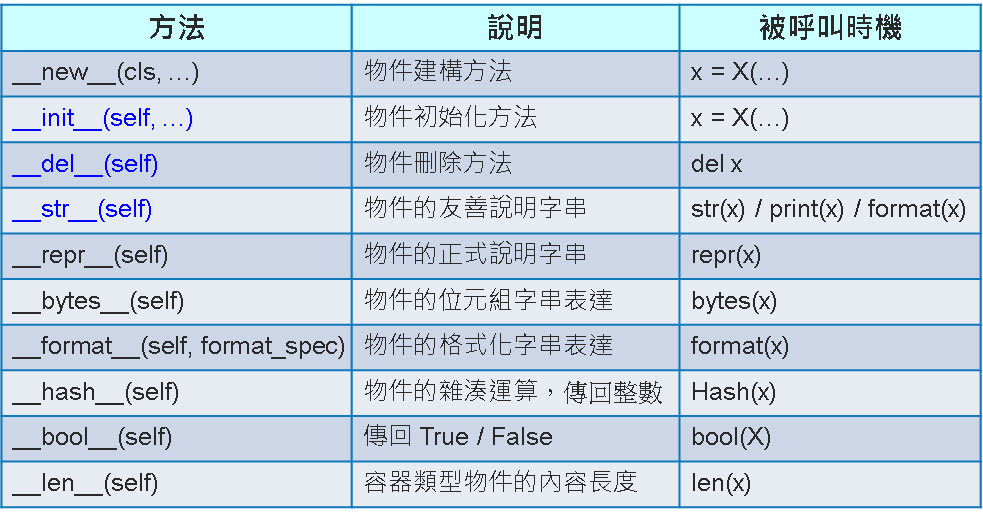

In [144]:
class Point:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y = y
    def __del__(self):
        print("del:",id(self))      
print(id(p1))       
p1 = Point() #系統自動移除p1

2554431809376
del: 2554431809376


In [197]:
class Point:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y = y
    def __del__(self):
        print("del:",id(self))     
p1 = Point()
print(id(p1))
p2 = p1
del p1   #手動移除p1
#del p2 

2554432780752
del: 2554432780752


In [210]:
class Point:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y = y
    def __del__(self):
        print("del:",id(self))  
list1 = []
p1 = Point()
p2 = Point()
list1.append(p1)
list1.append(p2)
print(id(p1))
list1.pop(0) # p1彈出 讓list的p1移除
del p1 #再刪除p1 才能真的del p1的物件

del: 2554431809616
2554431808896
del: 2554431808896


In [214]:
class Point:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
p1 = Point(5,6)
print(p1)

(5,6)


# Python類別特殊方法

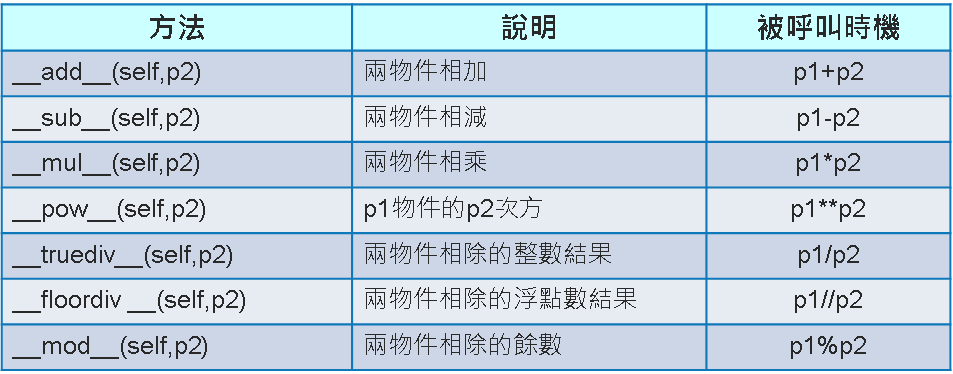
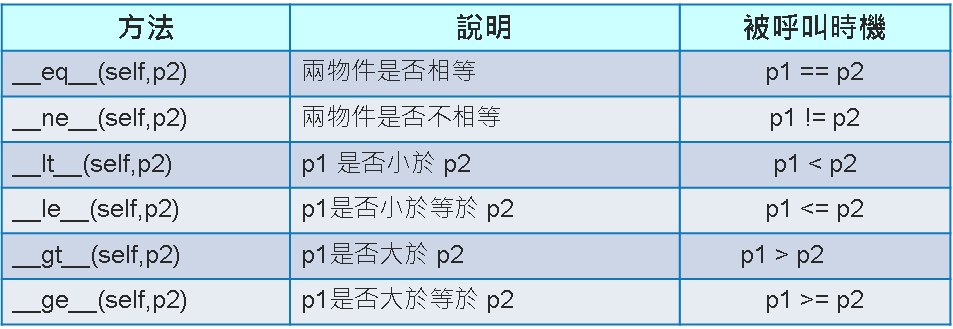

In [217]:
class Point:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
    def __len__(self):
        myLen = (self.x ** 2) +  (self.y ** 2)
        return myLen
    def __lt__(self,other):
        return len(self) < len(other)
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return  Point(x,y)
     
p1 = Point(1,2)
print(len(p1))

p1 = Point(1,1)
p2 = Point(-2,-3)
print(p1 < p2)
p3 = p1+p2
print(p3)

5
True
(-1,-2)


## 抽象類別
+ 建立抽象元類別
  + 宣告抽象類別
    + class 抽象類別(metaclass=ABCMeta)
       +無法建構物件的類別
  + 為子類定義共有的API
    + 方法前加上@abstractmethod 裝飾
    + 不需要具體實現。
        @abstractmethod
        def 抽象方法(self, …)


In [226]:
from abc import ABCMeta, abstractmethod
class Animal(metaclass=ABCMeta):
        def __init__(self,name):
            self.__name = name
        @abstractmethod  
        def bark(self):
            pass
        def getName(self):
            return self.__name
        def __str__(self):
            return self.bark()
class Dog(Animal):
    def bark(self):        
        return self.getName()+":"+"汪汪"
    
dog = Dog("ToTo")
print(dog)

ToTo:汪汪


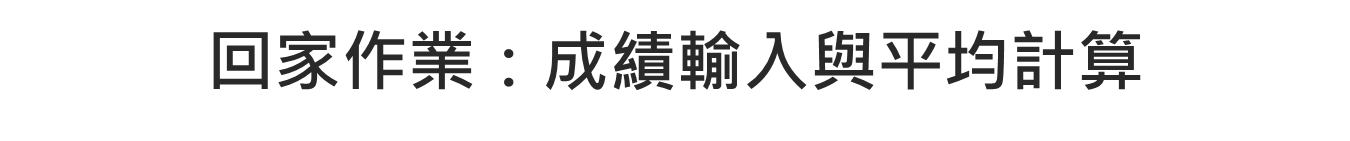
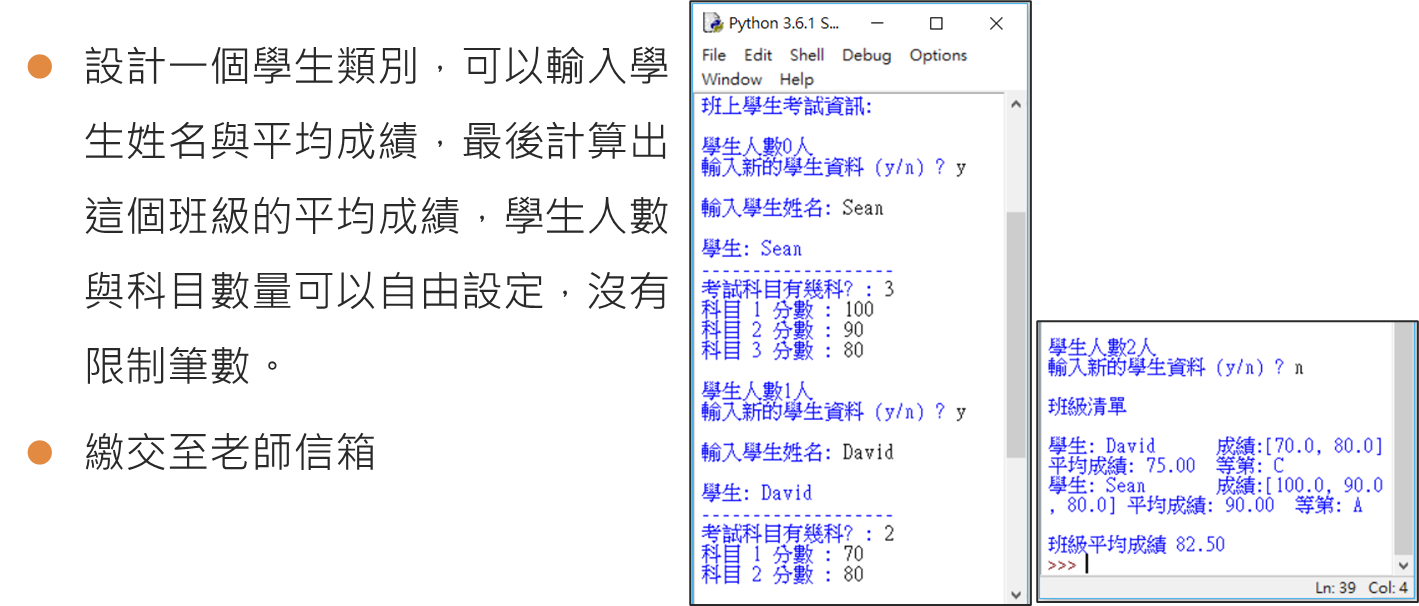